In [19]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/dell/Documents/GitHub/ML-Mastery/Datasets/Airbnb_NYC.csv")  

# Display basic info
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [20]:
# Load dataset
df = pd.read_csv("C:/Users/dell/Documents/GitHub/ML-Mastery/Datasets/Airbnb_NYC.csv")  
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with too many missing values 
df.dropna(subset=['reviews_per_month'], inplace=True)

# Convert date columns to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

# Drop duplicates
df.drop_duplicates(inplace=True)

# Display updated info
df.info()


Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38843 non-null  int64         
 1   name             

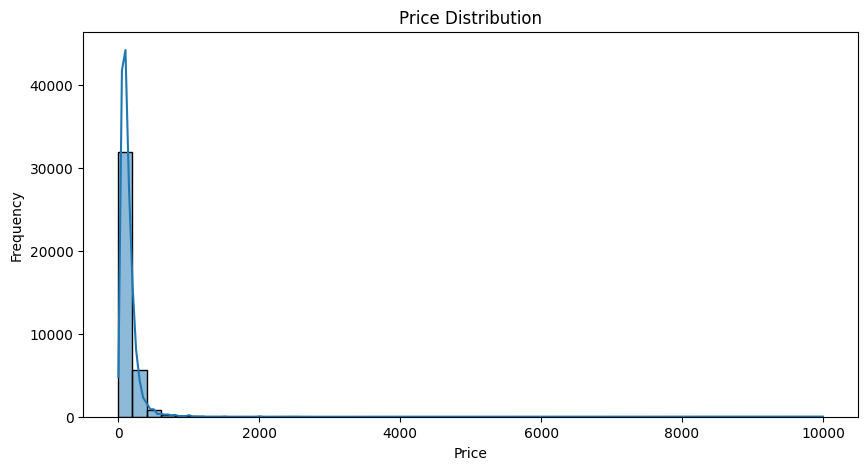

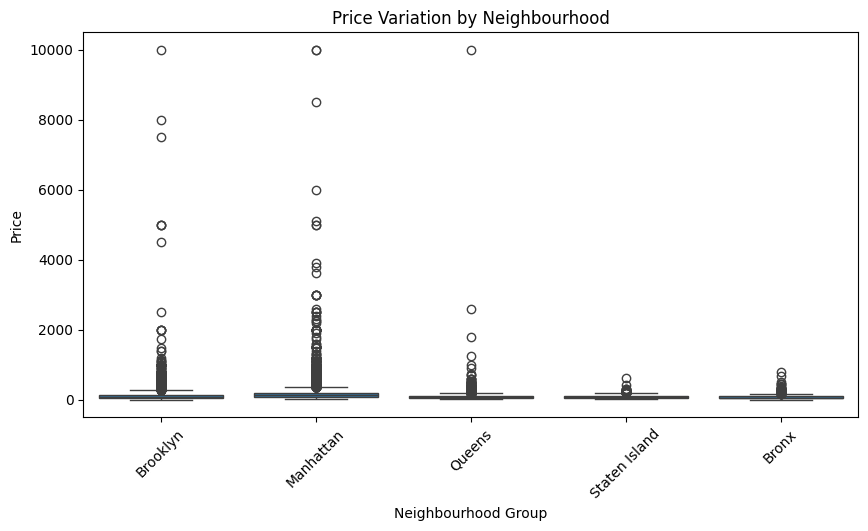

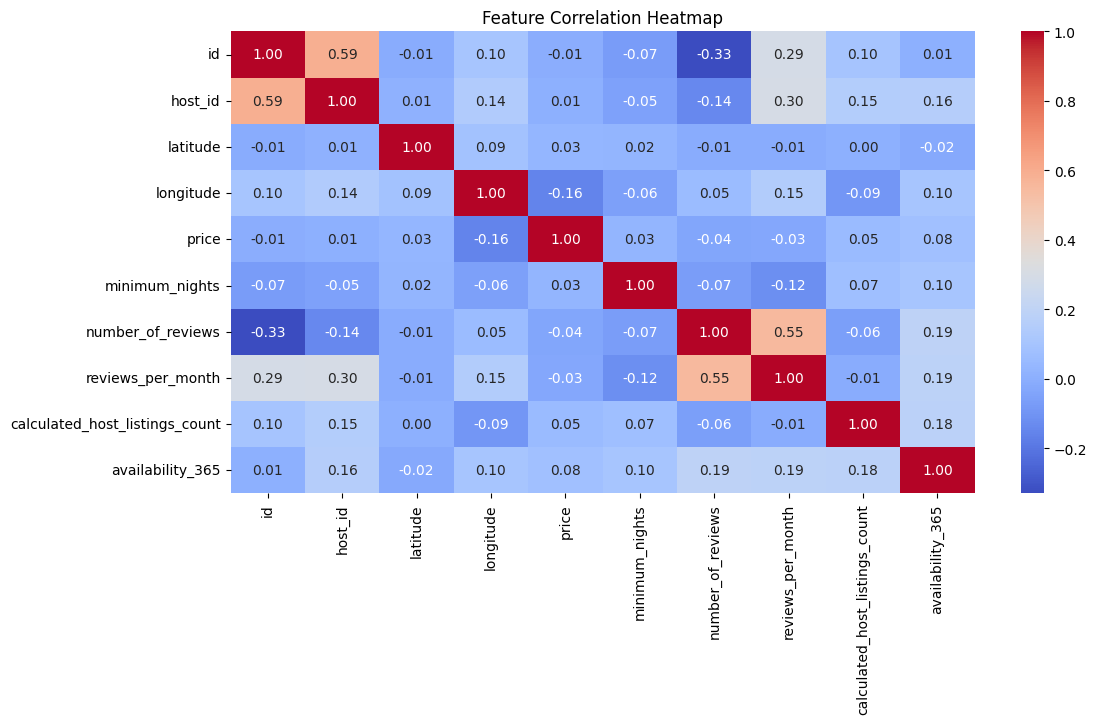

In [21]:
# Plot histogram of prices
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['neighbourhood_group'], y=df['price'])
plt.xticks(rotation=45)
plt.title('Price Variation by Neighbourhood')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



In [22]:
df.to_csv("C:/Users/dell/Documents/GitHub/ML-Mastery/Datasets/Airbnb_NYC_cleaned.csv", index=False)

Exploratory Data Analysis (EDA) on Airbnb NYC Listings  
 
# Project Overview  
This project explores the **New York City Airbnb dataset**, analyzing pricing patterns, location-based trends, and correlations between various factors affecting listing prices.  

# Key Steps:  
 **Data Cleaning** – Handled missing values, converted date columns, and removed duplicates.  
**Exploratory Analysis** – Visualized price distributions, outliers, and feature correlations.  
 **Insights Extraction** – Identified price trends across different neighborhoods.  

# Key Insights:  
- **Price Distribution:** Most listings are under $500, but a few extreme outliers exist.  
- **Neighborhood Trends:** **Manhattan** and **Brooklyn** have the highest median prices.  
- **Feature Correlations:** Room type and location significantly impact pricing.  

# Next Steps:  
- Use this cleaned dataset for **price prediction models**.  
- Deploy a **dynamic pricing recommendation system** in future projects.  

**Dataset Source:** [Kaggle - NYC Airbnb](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)  

